# Imports

In [60]:
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import functionsML as f
from itertools import combinations
from sklearn.linear_model import LinearRegression

from sklearn.svm import SVC
from sklearn.feature_selection import RFE

from sklearn.preprocessing import MinMaxScaler

# data partition
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import importlib
importlib.reload(f)

"""import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import functionsML as f

import importlib
importlib.reload(f)
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer, mean_squared_error # Para definir a métrica
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LassoCV"""

'import sqlite3\nimport os\nimport pandas as pd\nimport numpy as np\nimport matplotlib.pyplot as plt\nimport seaborn as sns\nimport functionsML as f\n\nimport importlib\nimportlib.reload(f)\nimport statsmodels.formula.api as smf\nfrom statsmodels.stats.anova import anova_lm\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.linear_model import Ridge\nfrom sklearn.feature_selection import RFE\nfrom sklearn.model_selection import KFold\nfrom sklearn.metrics import make_scorer, mean_squared_error # Para definir a métrica\nfrom sklearn.feature_selection import RFECV\nfrom sklearn.linear_model import LassoCV'

**Import data sets**

In [38]:
train_db = pd.read_csv("C:/Users/ricar/Desktop/cars4you/train.csv")
test_db = pd.read_csv("C:/Users/ricar/Desktop/cars4you/test.csv")

"""
# Columns to check for NaNs
critical_cols = [
    'model', 'transmission', 'fuelType',  # categorical
    'tax', 'mpg', 'engineSize', 'paintQuality%', 'previousOwners'  # numeric
]

# Count rows with at least one NaN in the selected columns
rows_with_nan = train_db[critical_cols].isna().any(axis=1).sum()

print(f"Number of rows with at least one NaN in {critical_cols}: {rows_with_nan}")"""




'\n# Columns to check for NaNs\ncritical_cols = [\n    \'model\', \'transmission\', \'fuelType\',  # categorical\n    \'tax\', \'mpg\', \'engineSize\', \'paintQuality%\', \'previousOwners\'  # numeric\n]\n\n# Count rows with at least one NaN in the selected columns\nrows_with_nan = train_db[critical_cols].isna().any(axis=1).sum()\n\nprint(f"Number of rows with at least one NaN in {critical_cols}: {rows_with_nan}")'

In [62]:
test_db

,carID,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,89856,Hyundai,I30,2022.878006,Automatic,30700.000000,petrol,205.0,41.5,1.6,61.0,3.0,0.0
1,106581,VW,Tiguan,2017.000000,Semi-Auto,-48190.655673,Petrol,150.0,38.2,2.0,60.0,2.0,0.0
2,80886,BMW,2 Series,2016.000000,Automatic,36792.000000,Petrol,125.0,51.4,1.5,94.0,2.0,0.0
3,100174,Opel,Grandland X,2019.000000,Manual,5533.000000,Petrol,145.0,44.1,1.2,77.0,1.0,0.0
4,81376,BMW,1 Series,2019.000000,Semi-Auto,9058.000000,Diesel,150.0,51.4,2.0,45.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32562,105775,VW,Tiguan,2017.000000,Manual,27575.000000,Petrol,145.0,46.3,1.4,94.0,1.0,0.0
32563,81363,BMW,X2,2020.000000,Automatic,1980.000000,Petrol,145.0,34.0,2.0,39.0,3.0,0.0
32564,76833,Audi,Q5,2019.000000,Semi-Auto,8297.000000,Diesel,145.0,38.2,2.0,88.0,4.0,0.0
32565,91768,Mercedes,A Class,2019.000000,Manual,-50755.210230,Petrol,145.0,28.5,1.3,81.0,1.0,0.0


In [ ]:
"""cat_cols = train_db.select_dtypes(include=['object']).columns

y = train_db['price']

anova_results = {}

print("--- Teste F (ANOVA) para Relevância de Features Categóricas ---")
print("   (H0: A variável não é relevante para prever 'price')\n")

for var in cat_cols:
    formula = f'price ~ C({var})'
    try:
        lm = smf.ols(formula, data=train_db).fit()
        anova_table = anova_lm(lm, typ=2)
        p_value = anova_table.loc[f'C({var})', 'PR(>F)']

        if p_value < 0.05:
            result = f"{var} é RELEVANTE (P-value: {p_value:.5f})"
        else:
            result = f"{var} NÃO é relevante (P-value: {p_value:.5f})"

        anova_results[var] = p_value
        print(f"Resultado para {var}: {result}")

    except Exception as e:
        print(f"Erro ao processar {var}: {e}")"""

--- Teste F (ANOVA) para Relevância de Features Categóricas ---
   (H0: A variável não é relevante para prever 'price')

Resultado para Brand: Brand é RELEVANTE (P-value: 0.00000)
Resultado para model: model é RELEVANTE (P-value: 0.00000)
Resultado para transmission: transmission é RELEVANTE (P-value: 0.00000)
Resultado para fuelType: fuelType é RELEVANTE (P-value: 0.00000)


In [ ]:


"""def correlation_ratio(categories, values):
    # Drop missing pairs
    valid = pd.DataFrame({'cat': categories, 'val': values}).dropna()
    categories = valid['cat']
    values = valid['val']
    
    cat_means = values.groupby(categories).mean()
    n = values.groupby(categories).size()
    overall_mean = values.mean()
    
    numerator = (n * (cat_means - overall_mean)**2).sum()
    denominator = ((values - overall_mean)**2).sum()
    return np.sqrt(numerator / denominator)

eta = correlation_ratio(train_db['model'], train_db['engineSize'])
print("Correlation ratio (η):", eta)

#correlation_ratio(train_db['Brand'], train_db['engineSize'])"""

Correlation ratio (η): 0.7894316626544114


### Data exploration

In [83]:
train_db.head(15)

#typos in transmission and fuel
#engineSize with NaN
#mileage, mpg and previousOwners with irational values
#previousOwners with negative values
#hasDamage seems to always be 0

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,69512,VW,Golf,2016.0,22290,Semi-Auto,28421.000000,Petrol,NaN,11.417268,2.0,63.0,4.000000,0.0
1,53000,Toyota,Yaris,2019.0,13790,Manual,4589.000000,Petrol,145.0,47.900000,1.5,50.0,1.000000,0.0
2,6366,Audi,Q2,2019.0,24990,Semi-Auto,3624.000000,Petrol,145.0,40.900000,1.5,56.0,4.000000,0.0
3,29021,Ford,FIESTA,2018.0,12500,anual,9102.000000,Petrol,145.0,65.700000,1.0,50.0,-2.340306,0.0
4,10062,BMW,2 Series,2019.0,22995,Manual,1000.000000,Petrol,145.0,42.800000,1.5,97.0,3.000000,0.0
5,14704,BMW,3 Series,2014.0,8199,anual,101153.348285,Diesel,30.0,65.700000,2.0,74.0,0.000000,0.0
6,6924,Audi,A3,2017.0,16089,Manual,21396.000000,Petrol,20.0,60.100000,1.4,75.0,4.000000,0.0
7,50783,Skoda,Octavia,2017.0,7500,Manual,116750.000000,Diesel,145.0,68.900000,1.6,59.0,4.000000,0.0
8,67071,VW,Passat,2017.0,15999,Semi-Auto,30339.000000,Diesel,150.0,62.800000,2.0,85.0,4.000000,0.0
9,23348,Ford,Focus,2019.0,15300,Manual,10700.000000,Petrol,150.0,60.100000,1.0,35.0,1.000000,0.0


In [84]:
train_db.describe(include='object')

,Brand,model,transmission,fuelType
count,74452,74456,74451,74462
unique,72,735,40,34
top,Ford,Focus,Manual,Petrol
freq,14808,6353,38050,37995


In [85]:
test_db.describe(include='object')

,Brand,model,transmission,fuelType
count,31918,31917,31944,31911
unique,64,593,38,29
top,Ford,Focus,Manual,Petrol
freq,6360,2721,16312,16113


In [86]:
train_db.describe()
#missing values in year mileage tax mpg engineSize paintQuality% previousOwners and hasDamage
#alarming min values in mileage tax mpg engineSize paintQuality% previousOwners
#alarming max values in year mpg paintQuality% previousOwners
#engineSize of max 6.6 can be realistic if the car is a truck
#hasDamage is always 0

,carID,year,price,mileage,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
count,75973.000000,74482.000000,75973.000000,74510.000000,68069.000000,68047.000000,74457.000000,74449.000000,74423.000000,74425.0
mean,37986.000000,2017.096611,16881.889553,23004.184088,120.329078,55.152666,1.660136,64.590667,1.994580,0.0
std,21931.660338,2.208704,9736.926322,22129.788366,65.521176,16.497837,0.573462,21.021065,1.472981,0.0
min,0.000000,1970.000000,450.000000,-58540.574478,-91.121630,-43.421768,-0.103493,1.638913,-2.345650,0.0
25%,18993.000000,2016.000000,10200.000000,7423.250000,125.000000,46.300000,1.200000,47.000000,1.000000,0.0
50%,37986.000000,2017.000000,14699.000000,17300.000000,145.000000,54.300000,1.600000,65.000000,2.000000,0.0
75%,56979.000000,2019.000000,20950.000000,32427.500000,145.000000,62.800000,2.000000,82.000000,3.000000,0.0
max,75972.000000,2024.121759,159999.000000,323000.000000,580.000000,470.800000,6.600000,125.594308,6.258371,0.0


In [87]:
test_db.describe()
#missing values in year mileage tax mpg engineSize paintQuality% previousOwners and hasDamage
#alarming min values in mileage tax mpg engineSize paintQuality% previousOwners
#alarming max values in year mpg paintQuality% previousOwners
#engineSize of max 6.6 can be realistic if the car is a truck
#hasDamage is always 0

,carID,year,mileage,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
count,32567.000000,31914.000000,31878.000000,29259.000000,29279.000000,31939.000000,31942.000000,31970.000000,31970.0
mean,92256.000000,2017.102299,22952.658921,120.569239,55.210728,1.665377,64.446667,2.006118,0.0
std,9401.427445,2.207969,22132.758713,65.560570,17.644635,0.574467,21.142188,1.472310,0.0
min,75973.000000,1991.000000,-58540.574478,-91.121630,-43.421768,-0.103493,1.638913,-2.345650,0.0
25%,84114.500000,2016.000000,7298.250000,125.000000,46.300000,1.200000,47.000000,1.000000,0.0
50%,92256.000000,2017.000000,17225.500000,145.000000,54.300000,1.600000,65.000000,2.000000,0.0
75%,100397.500000,2019.000000,32500.000000,145.000000,62.800000,2.000000,82.000000,3.000000,0.0
max,108539.000000,2024.121759,279000.000000,580.000000,470.800000,6.600000,125.594308,6.258371,0.0


In [88]:
train_db.info()
#year is float64, should be int64
#previousIwbers is float, should be int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75973 entries, 0 to 75972
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carID           75973 non-null  int64  
 1   Brand           74452 non-null  object 
 2   model           74456 non-null  object 
 3   year            74482 non-null  float64
 4   price           75973 non-null  int64  
 5   transmission    74451 non-null  object 
 6   mileage         74510 non-null  float64
 7   fuelType        74462 non-null  object 
 8   tax             68069 non-null  float64
 9   mpg             68047 non-null  float64
 10  engineSize      74457 non-null  float64
 11  paintQuality%   74449 non-null  float64
 12  previousOwners  74423 non-null  float64
 13  hasDamage       74425 non-null  float64
dtypes: float64(8), int64(2), object(4)
memory usage: 8.1+ MB


In [89]:
test_db.info()
#year is float64, should be int64
#previousIwbers is float, should be int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32567 entries, 0 to 32566
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carID           32567 non-null  int64  
 1   Brand           31918 non-null  object 
 2   model           31917 non-null  object 
 3   year            31914 non-null  float64
 4   transmission    31944 non-null  object 
 5   mileage         31878 non-null  float64
 6   fuelType        31911 non-null  object 
 7   tax             29259 non-null  float64
 8   mpg             29279 non-null  float64
 9   engineSize      31939 non-null  float64
 10  paintQuality%   31942 non-null  float64
 11  previousOwners  31970 non-null  float64
 12  hasDamage       31970 non-null  float64
dtypes: float64(8), int64(1), object(4)
memory usage: 3.2+ MB


In [4]:
f.missing_values_table(train_db)

Total columns: 14
Columns with missing values: 12



,Missing Values,Percent Missing (%)
mpg,7926,10.43
tax,7904,10.40
hasDamage,1548,2.04
previousOwners,1550,2.04
paintQuality%,1524,2.01
transmission,1522,2.00
model,1517,2.00
Brand,1521,2.00
engineSize,1516,2.00
fuelType,1511,1.99


In [ ]:
train_db[train_db["mpg"].isna()].head(10)

In [ ]:
train_db[train_db["tax"].isna()].head(10)

In [ ]:
train_db[train_db["hasDamage"].isna()].head(10)

In [ ]:
train_db[train_db["previousOwners"].isna()].head(10)

In [ ]:
train_db[train_db["paintQuality%"].isna()].head(10)

In [ ]:
train_db[train_db["transmission"].isna()].head(10)

In [ ]:
train_db[train_db["model"].isna()].head(10)

In [ ]:
train_db[train_db["Brand"].isna()].head(10)

In [ ]:
train_db[train_db["engineSize"].isna()].head(10)

In [ ]:
train_db[train_db["fuelType"].isna()].head(10)

In [ ]:
train_db[train_db["year"].isna()].head(10)

In [ ]:
train_db[train_db["mileage"].isna()].head(10)

In [ ]:
f.negative_values_table(train_db)

In [ ]:
train_db[train_db["tax"] < 0].head(10)

In [ ]:
train_db[train_db["tax"] < 0]["tax"].unique()[:10]

In [ ]:
train_db[train_db["mileage"] < 0].head(10)

In [ ]:
train_db[train_db["mileage"] < 0]["mileage"].unique()[:10]

In [ ]:
train_db[train_db["previousOwners"] < 0].head(10)

In [ ]:
train_db[train_db["previousOwners"] < 0]["previousOwners"].unique()[:10]

In [ ]:
train_db[train_db["engineSize"] < 0].head(10)

In [ ]:
train_db[train_db["engineSize"] < 0]["engineSize"].unique()[:10]

In [ ]:
train_db[train_db["mpg"] < 0].head(10)

In [ ]:
train_db[train_db["mpg"] < 0]["mpg"].unique()[:10]

In [7]:
f.irrational_values_table(train_db)

Total numeric columns: 10
Columns with irrational values: 7
Rows with at least one irrational value: 5060



,Irrational Count,Percent Irrational (%)
tax,759,1.00
engineSize,762,1.00
mileage,755,0.99
previousOwners,734,0.97
mpg,738,0.97
paintQuality%,726,0.96
year,723,0.95
Total (rows with any irrational value),5060,6.66


**Unique Values**

In [90]:
# Loop through each column in the DataFrame
for column in train_db.columns:

    # Print unique values and count for columns with fewer than 20 unique values
    print(f"Unique values in '{column}': {train_db[column].unique()}")
    print(f"Number of unique values: {train_db[column].nunique()}\n")

#typos in every categorical variable
#different letter casing in every categorical variable
#unrealistic negative values and irrational values in every numerical category


Unique values in 'carID': [69512 53000  6366 ... 54886   860 15795]
Number of unique values: 75973

Unique values in 'Brand': ['VW' 'Toyota' 'Audi' 'Ford' 'BMW' 'Skoda' 'Opel' 'Mercedes' 'FOR'
 'mercedes' 'Hyundai' 'w' 'ord' 'MW' 'bmw' nan 'yundai' 'BM' 'Toyot' 'udi'
 'Ope' 'AUDI' 'V' 'opel' 'pel' 'For' 'pe' 'Mercede' 'audi' 'MERCEDES'
 'OPEL' 'koda' 'FORD' 'Hyunda' 'W' 'Aud' 'vw' 'hyundai' 'skoda' 'ford'
 'TOYOTA' 'ercedes' 'oyota' 'toyota' 'SKODA' 'Skod' 'HYUNDAI' 'kod' 'v'
 'for' 'SKOD' 'aud' 'KODA' 'PEL' 'yunda' 'or' 'UDI' 'OYOTA' 'HYUNDA' 'mw'
 'OPE' 'mercede' 'ERCEDES' 'ercede' 'TOYOT' 'MERCEDE' 'ORD' 'ud' 'ope'
 'AUD' 'hyunda' 'skod' 'toyot']
Number of unique values: 72

Unique values in 'model': [' Golf' ' Yaris' ' Q2' ' FIESTA' ' 2 Series' '3 Series' ' A3' ' Octavia'
 ' Passat' ' Focus' ' Insignia' ' A Clas' ' Q3' ' Fabia' ' A Class' ' Ka+'
 ' 3 Series' ' GLC Class' ' I30' ' C Class' ' Polo' ' E Class' ' C Clas'
 ' Q5' ' Up' ' Fiesta' ' C-HR' ' Mokka X' ' Corsa' ' Astra' ' TT'

**Correlation Matrix**

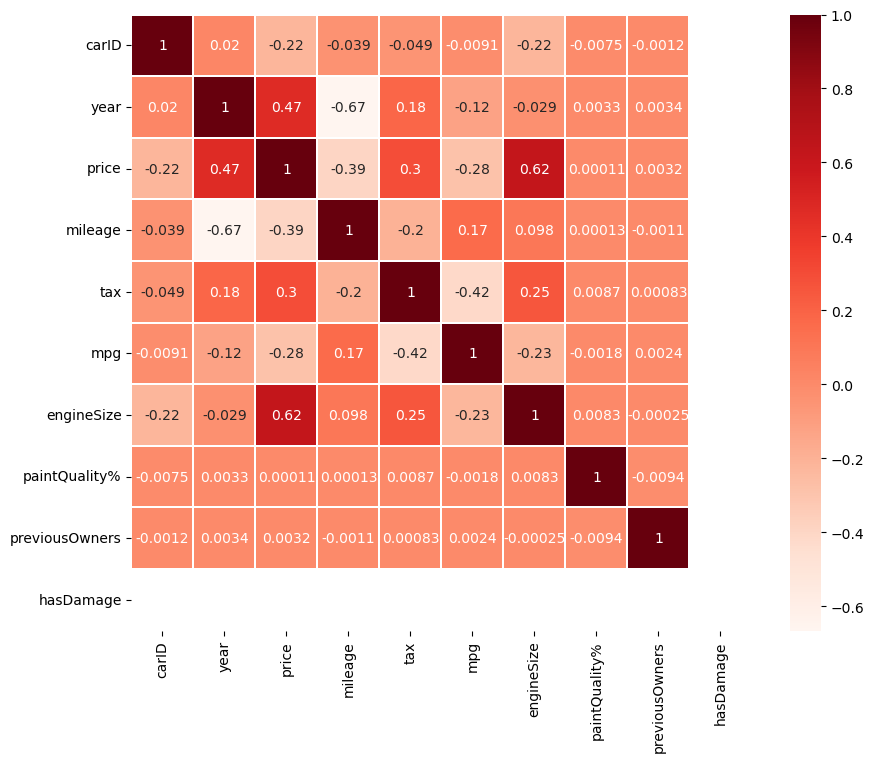

In [13]:
# Remove rows with missing values
temp = train_db.dropna()

# Select numerical columns for correlation analysis
corr_data = temp.select_dtypes(include=["number"])

# Compute the Pearson correlation matrix
correlation_matrix = corr_data.corr(method="pearson")

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap = plt.cm.Reds, linewidths=0.1)
plt.show()

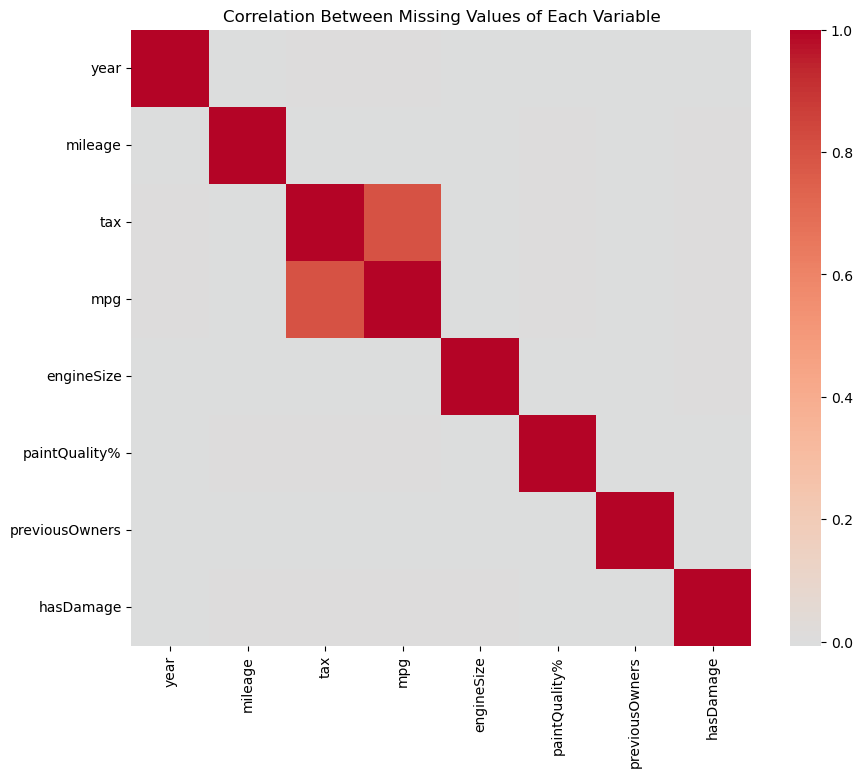

In [8]:

missing_mask = train_db.drop(columns=["carID", "price"], errors="ignore").select_dtypes(include=["number"]).isna()

missing_corr = missing_mask.corr()

# Plot the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(missing_corr, cmap="coolwarm", center=0, annot=False)
plt.title("Correlation Between Missing Values of Each Variable")
plt.show()

## Distributions & Value Counts

In [99]:
train_db["Brand"].value_counts()

Brand
Ford        14808
Mercedes    10754
VW           9780
Opel         8645
BMW          6968
            ...  
OYOTA           2
SKOD            1
TOYOT           1
skod            1
toyot           1
Name: count, Length: 72, dtype: int64

In [100]:
train_db["model"].value_counts()

model
 Focus        6353
 C Class      4886
 Fiesta       4130
 Golf         3081
 Corsa        2182
              ... 
M5               1
 gls class       1
Mokka            1
 6 Serie         1
 JETTA           1
Name: count, Length: 735, dtype: int64

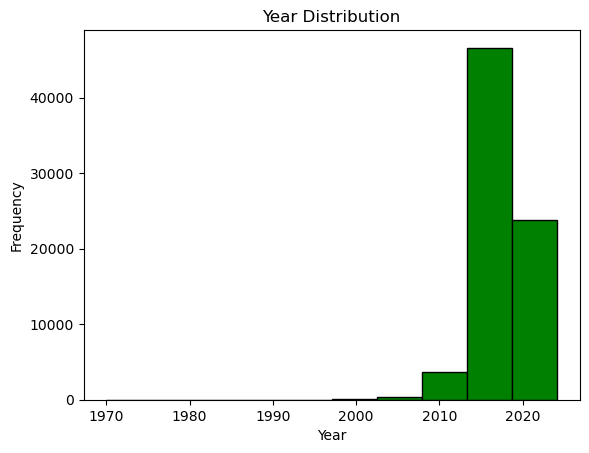

In [92]:
# Plot histogram for the "year" column
f.plot_histogram(train_db["year"], 
                 "Year",         # x-axis label
                 "Frequency",   # y-axis label
                 "Year Distribution")  # title of the plot

In [101]:
train_db["transmission"].value_counts()

transmission
Manual       38050
Semi-Auto    15545
Automatic    14003
anual          804
MANUAL         801
manual         770
Manua          759
unknown        690
 Manual        366
Semi-Aut       332
emi-Auto       325
semi-auto      324
utomatic       313
SEMI-AUTO      309
Automati       304
AUTOMATIC      289
automatic      282
unknow          18
Manual          16
UNKNOWN         14
ANUAL           13
nknown          13
anua            12
SEMI-AUT        11
MANUA           11
emi-auto        10
 MANUAL          9
EMI-AUTO         7
 Manual          7
automati         6
utomati          6
 manual          6
AUTOMATI         6
emi-Aut          5
Other            5
semi-aut         4
manua            2
UTOMATIC         2
manual           1
nknow            1
Name: count, dtype: int64

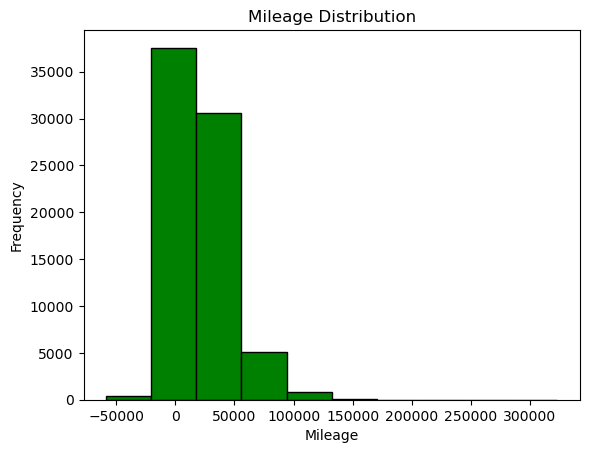

In [93]:
# Plot histogram for the "mileage" column
f.plot_histogram(train_db["mileage"], 
                 "Mileage",         # x-axis label
                 "Frequency",   # y-axis label
                 "Mileage Distribution")  # title of the plot

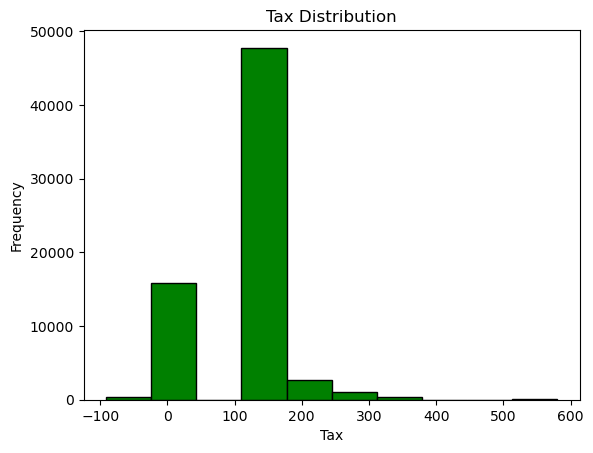

In [94]:
# Plot histogram for the "tax" column
f.plot_histogram(train_db["tax"], 
                 "Tax",         # x-axis label
                 "Frequency",   # y-axis label
                 "Tax Distribution")  # title of the ploty

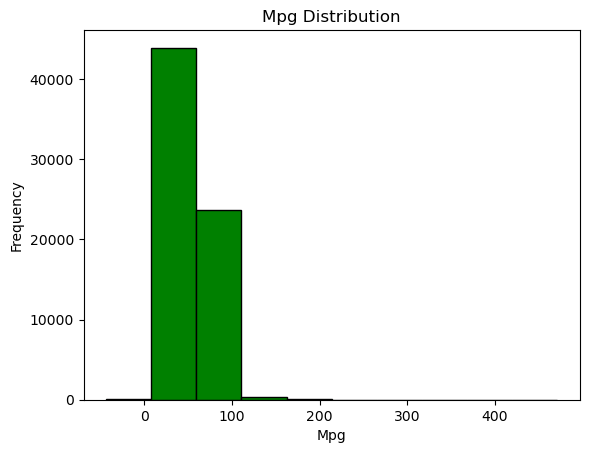

In [95]:
# Plot histogram for the "mpg" column
f.plot_histogram(train_db["mpg"], 
                 "Mpg",         # x-axis label
                 "Frequency",   # y-axis label
                 "Mpg Distribution")  # title of the ploty

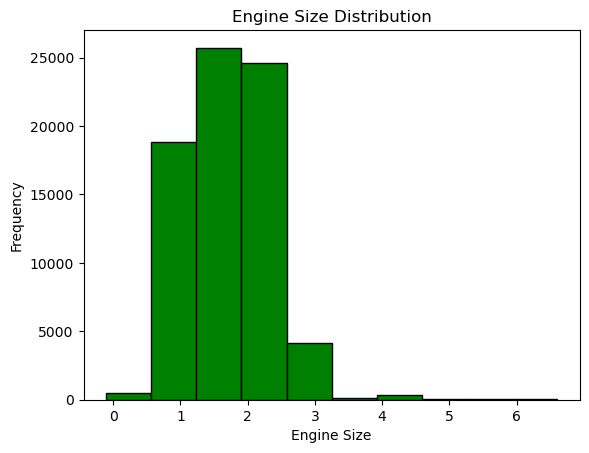

In [96]:
# Plot histogram for the "engineSize" column
f.plot_histogram(train_db["engineSize"], 
                 "Engine Size",         # x-axis label
                 "Frequency",   # y-axis label
                 "Engine Size Distribution")  # title of the ploty

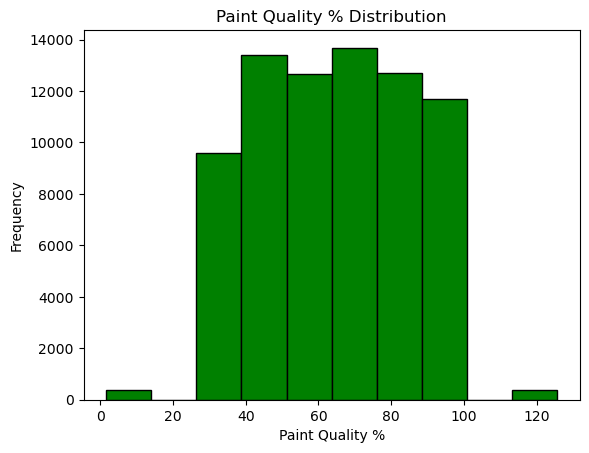

In [97]:
# Plot histogram for the "paintQuality%" column
f.plot_histogram(train_db["paintQuality%"], 
                 "Paint Quality %",         # x-axis label
                 "Frequency",   # y-axis label
                 "Paint Quality % Distribution")  # title of the ploty

## Fixing issues

In [39]:
# Drop irrelevant column
train_db = train_db.drop(columns="hasDamage")

# Lowercase text columns
text_cols = train_db.select_dtypes(include=["object"]).columns
train_db[text_cols] = train_db[text_cols].apply(lambda x: x.str.lower() if x.dtype=="object" else x)


# Loop and fix all categorical columns
for col in train_db.select_dtypes(include="object").columns:
    train_db = f.fix_typos(col, train_db)


In [40]:
# Rounding future Int values
train_db.loc[:, "year"] = train_db["year"].round()

# Removes every negative and irrational number from previousOwners
train_db.loc[(train_db['previousOwners'] < 0) | (train_db['previousOwners'] % 1 != 0),'previousOwners'] = np.nan

# Rounds every irrational number into having one precision digit
for col in train_db.select_dtypes(include="float64").columns:
    # Round each column to 1 digit after the decimal
    train_db[col] = train_db[col].round(1)

# Remove paintQuality% above 100
train_db = train_db[train_db["paintQuality%"] <= 100]

# Remove every negative value out of the numeric columns
for col in train_db.select_dtypes(include="float64").columns:
    train_db = f.negative_to_nan_columns(col,train_db)

In [41]:
# Select all nominal columns
nominal_cols = train_db.select_dtypes(include='object').columns

# Compute Cramér's V between all pairs
for i, col1 in enumerate(nominal_cols):
    for col2 in nominal_cols[i+1:]:
        v = f.cramers_v(train_db[col1], train_db[col2])
        print(f"Cramér's V between {col1} and {col2}: {v:.3f}")


Cramér's V between Brand and model: 0.995
Cramér's V between Brand and transmission: 0.299
Cramér's V between Brand and fuelType: 0.278
Cramér's V between model and transmission: 0.363
Cramér's V between model and fuelType: 0.489
Cramér's V between transmission and fuelType: 0.199


In [ ]:
"""num_cols = train_db.select_dtypes(include='number').drop(columns=['carID', 'price'], errors='ignore').columns
cat_cols = train_db.select_dtypes(include=['object', 'category']).columns

# Categorical directional associations
print("\nTheil’s U directionally for Categorical Variables:")
for c1 in cat_cols:
    u_scores = {}
    for c2 in cat_cols:
        if c2 == c1:
            continue
        # U(c1 | c2) — how much knowing c2 tells about c1
        u_scores[c2] = f.theils_u(train_db[c1], train_db[c2])
    # pick best predictors for c1
    top3 = sorted(u_scores.items(), key=lambda x: x[1], reverse=True)[:3]
    print(f"\nFor categorical column '{c1}', best predictors:")
    for c2, u in top3:
        print(f"  U({c1} | {c2}) = {u:.3f}")"""


In [42]:


num_cols = train_db.select_dtypes(include='number').drop(columns=['carID', 'price'], errors='ignore').columns
cat_cols = train_db.select_dtypes(include=['object', 'category']).columns

# Try single and multi-column combinations up to this size
max_combo_size = 4 

print("\nTheil’s U directionally for Categorical Variables:")
for target in cat_cols:
    u_scores = {}
    
    for combo_size in range(1, max_combo_size + 1):
        for combo in combinations([c for c in cat_cols if c != target], combo_size):
            # Build a joint predictor variable by concatenating category values
            joint_name = " + ".join(combo)
            joint_var = train_db[list(combo)].astype(str).agg("_".join, axis=1)
            
            # Directional association: how much knowing combo tells about target
            u = f.theils_u(train_db[target], joint_var)
            u_scores[joint_name] = u

    # pick top combinations that best explain target
    top3 = sorted(u_scores.items(), key=lambda x: x[1], reverse=True)[:10]
    
    print(f"\nFor categorical column '{target}', best predictors:")
    for combo, u in top3:
        print(f"  U({target} | {combo}) = {u:.3f}")



Theil’s U directionally for Categorical Variables:

For categorical column 'Brand', best predictors:
  U(Brand | model + transmission + fuelType) = 0.982
  U(Brand | model + transmission) = 0.981
  U(Brand | model + fuelType) = 0.979
  U(Brand | model) = 0.977
  U(Brand | transmission + fuelType) = 0.133
  U(Brand | transmission) = 0.093
  U(Brand | fuelType) = 0.053

For categorical column 'model', best predictors:
  U(model | Brand + transmission + fuelType) = 0.562
  U(model | Brand + fuelType) = 0.538
  U(model | Brand + transmission) = 0.520
  U(model | Brand) = 0.494
  U(model | transmission + fuelType) = 0.132
  U(model | transmission) = 0.071
  U(model | fuelType) = 0.070

For categorical column 'transmission', best predictors:
  U(transmission | Brand + model + fuelType) = 0.327
  U(transmission | model + fuelType) = 0.317
  U(transmission | Brand + model) = 0.292
  U(transmission | model) = 0.282
  U(transmission | Brand + fuelType) = 0.230
  U(transmission | Brand) = 0.189


In [43]:


# Select numeric columns, excluding 'carID' and 'price'
num_cols = train_db.select_dtypes(include='number').drop(columns=['carID', 'price'], errors='ignore').columns

for target in num_cols:
    scores = {}
    predictors = [col for col in num_cols if col != target]
    
    # Check all pairs of predictors
    for combo in itertools.combinations(predictors, 2):
        X = train_db[list(combo)]
        y = train_db[target]
        
        # Drop rows with NaNs in either X or y
        df_temp = pd.concat([X, y], axis=1).dropna()
        X_clean = df_temp[list(combo)]
        y_clean = df_temp[target]
        
        # Fit linear regression and compute R²
        model = LinearRegression().fit(X_clean, y_clean)
        scores[combo] = model.score(X_clean, y_clean)
    
    # Get top 3 predictor pairs
    top3 = sorted(scores.items(), key=lambda x: x[1], reverse=True)[:3]
    
    print(f"\nFor numerical column '{target}', top predictor pairs (R²):")
    for combo, r2 in top3:
        print(f" {combo} => R² = {r2:.3f}")


NameError: name 'itertools' is not defined

In [123]:


def correlation_ratio(categories, values):
    df = pd.DataFrame({'cat': categories, 'val': values}).dropna()
    if df.empty:
        return 0.0
    group_stats = df.groupby('cat')['val'].agg(['mean', 'size'])
    overall_mean = df['val'].mean()
    num = (group_stats['size'] * (group_stats['mean'] - overall_mean) ** 2).sum()
    den = ((df['val'] - overall_mean) ** 2).sum()
    return np.sqrt(num / den) if den > 0 else 0.0

# Separate numeric and categorical columns
num_cols = train_db.select_dtypes(include='number').drop(columns=['carID', 'price'], errors='ignore').columns
cat_cols = train_db.select_dtypes(exclude='number').columns

for target in num_cols:
    scores = {}

    for num_paired in range(1, 3):
        # Numeric predictor combinations
        for combo in itertools.combinations([c for c in num_cols if c != target], num_paired):
            df = train_db[list(combo) + [target]].dropna()
            if df.empty:
                continue
            model = LinearRegression().fit(df[list(combo)], df[target])
            scores[combo] = model.score(df[list(combo)], df[target])

        # Categorical predictor combinations
        for cat_pair in itertools.combinations(cat_cols, num_paired):
            combined = train_db[list(cat_pair)].astype(str).agg('_'.join, axis=1)
            scores[cat_pair] = correlation_ratio(combined, train_db[target]) ** 2


    # --- Mixed numeric + categorical pairs  ---
    for num_col in [c for c in num_cols if c != target]:
        for cat_col in cat_cols:
            df = train_db[[num_col, cat_col, target]].dropna()
            if df.empty:
                continue
            # Discretize numeric variable into bins and combine with categorical
            numeric_bins = pd.cut(df[num_col], bins=15, duplicates='drop').astype(str)
            combined = df[cat_col].astype(str) + "_" + numeric_bins
            scores[(num_col, cat_col)] = correlation_ratio(combined, df[target]) ** 2

    # --- Top 3 helpers ---
    top3 = sorted(scores.items(), key=lambda x: x[1], reverse=True)[:3]
    print(f"\nFor numerical column '{target}', top helpers (R² or η²):")
    for combo, score in top3:
        print(f" {combo} => {score:.3f}")



For numerical column 'year', top helpers (R² or η²):
 ('mileage', 'model') => 0.559
 ('tax', 'model') => 0.499
 ('mileage', 'fuelType') => 0.472

For numerical column 'mileage', top helpers (R² or η²):
 ('year', 'model') => 0.465
 ('year', 'engineSize') => 0.456
 ('year', 'previousOwners') => 0.450

For numerical column 'tax', top helpers (R² or η²):
 ('year', 'model') => 0.482
 ('mpg', 'model') => 0.395
 ('mileage', 'model') => 0.357

For numerical column 'mpg', top helpers (R² or η²):
 ('model', 'fuelType') => 0.695
 ('tax', 'model') => 0.523
 ('engineSize', 'fuelType') => 0.504

For numerical column 'engineSize', top helpers (R² or η²):
 ('tax', 'model') => 0.704
 ('mpg', 'model') => 0.685
 ('model', 'fuelType') => 0.675

For numerical column 'paintQuality%', top helpers (R² or η²):
 ('model', 'transmission') => 0.044
 ('model', 'fuelType') => 0.036
 ('previousOwners', 'model') => 0.036

For numerical column 'previousOwners', top helpers (R² or η²):
 ('paintQuality%', 'model') => 0

In [ ]:
"""from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

# Select numeric columns, excluding 'carID' and 'price'
num_cols = train_db.select_dtypes(include='number').drop(columns=['carID', 'price'], errors='ignore').columns

results = []

for target in num_cols:
    best_r2 = -np.inf
    best_predictor = None
    
    for predictor in num_cols:
        if predictor == target:
            continue
        
        X = train_db[[predictor]]
        y = train_db[target]
        
        # Drop rows with NaNs
        df_temp = pd.concat([X, y], axis=1).dropna()
        X_clean = df_temp[[predictor]]
        y_clean = df_temp[target]
        
        # Fit linear regression and compute R²
        model = LinearRegression().fit(X_clean, y_clean)
        r2 = model.score(X_clean, y_clean)
        
        if r2 > best_r2:
            best_r2 = r2
            best_predictor = predictor
    
    results.append({
        'Target': target,
        'Best Predictor': best_predictor,
        'R²': best_r2
    })

# Convert to DataFrame and sort
results_df = pd.DataFrame(results).sort_values(by='R²', ascending=False)
print(results_df)"""


           Target Best Predictor        R²
7       hasDamage           year  1.000000
1         mileage           year  0.448145
0            year        mileage  0.448145
3             mpg            tax  0.175389
2             tax            mpg  0.175389
4      engineSize            tax  0.065904
5   paintQuality%            tax  0.000042
6  previousOwners  paintQuality%  0.000040


In [ ]:
"""import pandas as pd
import numpy as np

# Select numeric columns, excluding 'carID' and 'price'
num_cols = train_db.select_dtypes(include='number').drop(columns=['carID', 'price'], errors='ignore')

# Drop rows with any NaNs in numeric columns
num_cols_clean = num_cols.dropna(axis=0)

# Remove any columns with NaN names (just in case)
num_cols_clean = num_cols_clean.loc[:, num_cols_clean.columns.notna()]

# Compute Pearson correlation matrix
corr_matrix = num_cols_clean.corr(method='pearson')

# Print correlation matrix
print("Pearson Correlation Matrix:\n")
print(corr_matrix)

# Print strongest 1-on-1 correlation for each variable
print("\nStrongest 1-on-1 correlation for each variable:")
for col in corr_matrix.columns:
    if pd.isna(col):
        continue

    # Drop self-correlation
    temp = corr_matrix[col].drop(labels=[col], errors='ignore')
    
    # Skip if temp is empty or all NaNs
    if temp.empty or temp.isna().all():
        print(f"{col} ↔ None : r = NaN")
        continue
    
    # idxmax returns the index of the max absolute value
    strongest = temp.abs().idxmax()
    if pd.isna(strongest):
        print(f"{col} ↔ None : r = NaN")
        continue
    
    value = temp[strongest]
    print(f"{col} ↔ {strongest} : r = {value:.3f}")
"""

Pearson Correlation Matrix:

                    year   mileage       tax       mpg  engineSize  \
year            1.000000 -0.665812  0.184891 -0.125662   -0.028644   
mileage        -0.665812  1.000000 -0.205368  0.165237    0.097407   
tax             0.184891 -0.205368  1.000000 -0.416003    0.255073   
mpg            -0.125662  0.165237 -0.416003  1.000000   -0.226196   
engineSize     -0.028644  0.097407  0.255073 -0.226196    1.000000   
paintQuality%   0.004578 -0.001060  0.008727 -0.002569    0.007009   
previousOwners  0.002691  0.000445  0.001491  0.001025    0.001059   
hasDamage            NaN       NaN       NaN       NaN         NaN   

                paintQuality%  previousOwners  hasDamage  
year                 0.004578        0.002691        NaN  
mileage             -0.001060        0.000445        NaN  
tax                  0.008727        0.001491        NaN  
mpg                 -0.002569        0.001025        NaN  
engineSize           0.007009        0.001059

### -----POR DAR CLEAN UP-----

In [44]:
# Safely convert previousOwners and year to nullable integers
train_db["previousOwners"] = pd.to_numeric(train_db["previousOwners"], errors='coerce').round().astype("Int64")
train_db["year"] = pd.to_numeric(train_db["year"], errors='coerce').round().astype("Int64")

# Handle Brand for i3
idx_to_drop = train_db[(train_db['model'] == 'i3') & (train_db['Brand'].isna())].index
train_db = train_db.drop(idx_to_drop)

# Fill categorical columns
train_db = f.fill_NaN_with_categorical(train_db, "Brand", ["model","transmission","fuelType"])
train_db = f.fill_NaN_with_categorical(train_db, "Brand", ["model","transmission"])
train_db = f.fill_NaN_with_categorical(train_db, "model", ["Brand","transmission","fuelType"])
train_db = f.fill_NaN_with_categorical(train_db, "model", ["Brand","transmission"])
train_db = f.fill_NaN_with_categorical(train_db, "mpg", ["model","fuelType"])
train_db = f.fill_NaN_with_categorical(train_db, "mpg", ["model"])
train_db["transmission"] = train_db["transmission"].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))
train_db["fuelType"] = train_db["fuelType"].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

# Fill numeric columns with mixed helper approach
train_db = f.fill_NaN_with_mixed(train_db, "year", "model", "mileage")
train_db = f.fill_NaN_with_mixed(train_db, "mileage", "model", "year")
train_db = f.fill_NaN_with_mixed(train_db, "tax", "model", "year")
train_db = f.fill_NaN_with_mixed(train_db, "engineSize", "model", "tax")

# Fill numeric columns with median
train_db["paintQuality%"] = train_db["paintQuality%"].transform(lambda x: x.fillna(x.median()))
train_db["previousOwners"] = train_db["previousOwners"].transform(lambda x: x.fillna(x.median())).round().astype("Int64")

# Drop any remaining NaNs
train_db = train_db.dropna()


c:\Users\ricar\Documents\GitHub\ProjetoML\functionsML.py:79: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_filled = df.groupby(helper_cols, group_keys=False).apply(fill_group_cat, target_col)
c:\Users\ricar\Documents\GitHub\ProjetoML\functionsML.py:79: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_filled = df.groupby(helper_cols, group_keys=False).apply(fill_group_cat, target_col)
c:\Users\ricar\Documents\GitHu

In [162]:
train_db.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69963 entries, 0 to 75972
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carID           69963 non-null  int64  
 1   Brand           69963 non-null  object 
 2   model           69963 non-null  object 
 3   year            69963 non-null  Int64  
 4   price           69963 non-null  int64  
 5   transmission    69963 non-null  object 
 6   mileage         69963 non-null  float64
 7   fuelType        69963 non-null  object 
 8   tax             69963 non-null  float64
 9   mpg             69963 non-null  float64
 10  engineSize      69963 non-null  float64
 11  paintQuality%   69963 non-null  float64
 12  previousOwners  69963 non-null  Int64  
 13  hasDamage       69963 non-null  float64
dtypes: Int64(2), float64(6), int64(2), object(4)
memory usage: 8.1+ MB


In [ ]:

"""
# Drop rows with missing model
train_db = train_db.dropna(subset=["model"])

# Round previousOwners and convert to integer

train_db.loc[:, "previousOwners"] = train_db["previousOwners"].astype("Int64")

train_db = f.fill_invalid_by_category("previousOwners",train_db,"model")


train_db = f.fill_invalid_by_category("paintQuality%",train_db,"model")

# Fill numeric year
train_db = f.fill_NaN_with_mixed(train_db,"model","mileage")
#train_db = f.fill_years(train_db)
#train_db.loc[:, "year"] = train_db.groupby("price")["year"].transform(lambda x: x.fillna(x.median()))
#train_db.loc[:, "year"] = train_db.loc[:, "year"].copy().round().astype("Int64")
train_db = train_db.dropna(subset=["year"])

# Engine size treatment

train_db = f.fill_invalid_by_category("engineSize",train_db,"model")

# Tax and Mpg tratment

train_db = f.fill_invalid_by_category("mpg",train_db,"model")
train_db = f.fill_invalid_by_category("tax",train_db,"model")
train_db.loc[:, "tax"] = train_db.groupby("mpg")["tax"].transform(lambda x: x.fillna(x.median()))
train_db.loc[:, "mpg"] = train_db.groupby("tax")["mpg"].transform(lambda x: x.fillna(x.median()))


# Mileage

train_db = f.fill_invalid_by_category("mileage",train_db,"model")
train_db.loc[:, "mileage"] = train_db.groupby("year")["mileage"].transform(lambda x: x.fillna(x.mean()))
train_db.loc[:, "mileage"] = train_db.groupby("price")["mileage"].transform(lambda x: x.fillna(x.mean()))

# Fill categorical transmission
train_db = f.fill_invalid_by_category("transmission",train_db,"model")
train_db = f.fill_invalid_by_category("transmission",train_db,"fuelType")

# Fill categorical fuelType
train_db = f.fill_invalid_by_category("fuelType",train_db,"engineSize")
train_db = f.fill_invalid_by_category("fuelType",train_db,"model")


# Handle Brand for i3
idx_to_drop = train_db[(train_db['model'] == 'i3') & (train_db['Brand'].isna())].index
train_db = train_db.drop(idx_to_drop)

# Fill Brands by model
train_db.loc[:, "Brand"] = train_db.groupby("model")["Brand"].transform(lambda x: x.ffill().bfill())"""

C:\Users\ricar\AppData\Local\Temp\ipykernel_25952\4055989397.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<IntegerArray>
[   4,    1,    4, <NA>,    3,    0,    4,    4,    4,    1,
 ...
    4,    4,    3,    0, <NA>,    0,    2,    3,    2,    1]
Length: 72599, dtype: Int64' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  train_db.loc[:, "previousOwners"] = train_db["previousOwners"].astype("Int64")
C:\Users\ricar\AppData\Local\Temp\ipykernel_25952\4055989397.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<IntegerArray>
[2016, 2019, 2019, 2018, 2019, 2014, 2017, 2017, 2017, 2019,
 ...
 2020, 2016, 2017, 2018, 2018, 2015, 2013, 2017, 2015, 2018]
Length: 72599, dtype: Int64' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  train_db.loc[:, "year"] = 

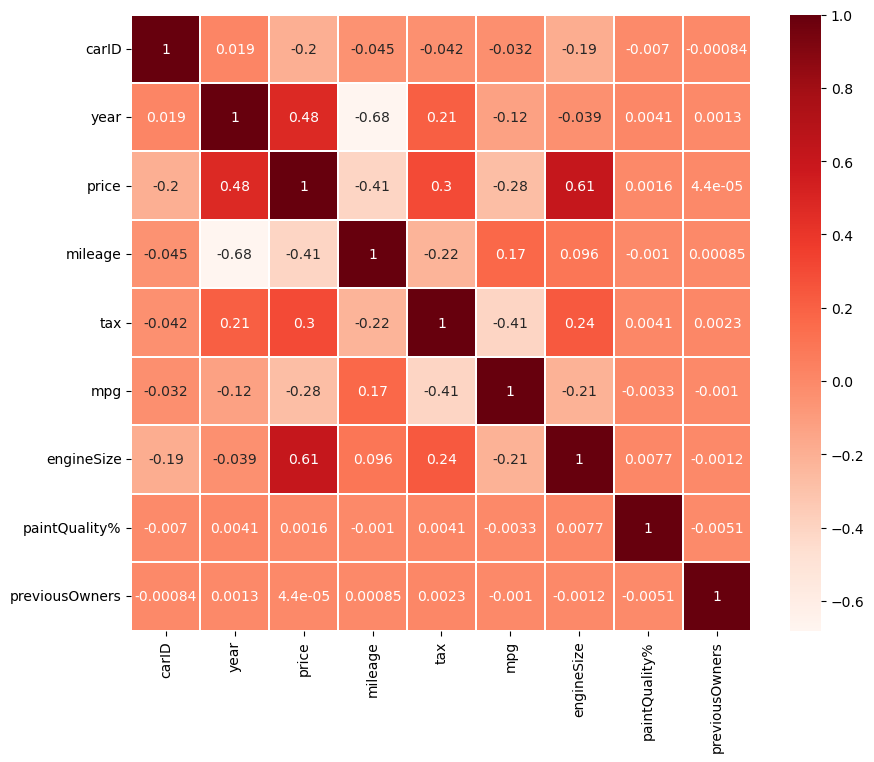

In [30]:
# Remove rows with missing values
temp = train_db.dropna()

# Select numerical columns for correlation analysis
corr_data = temp.select_dtypes(include=["number"])

# Compute the Pearson correlation matrix
correlation_matrix = corr_data.corr(method="pearson")

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap = plt.cm.Reds, linewidths=0.1)
plt.show()

In [45]:
X = train_db.drop(columns=["price","carID"])
y = train_db["price"]
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.3, 
                                                  random_state = 0, 
                                                  shuffle = True)

In [46]:
X_train_cat = X_train.select_dtypes(exclude=np.number).set_index(X_train.index)

X_train_num = X_train.select_dtypes(include=np.number).set_index(X_train.index)

# repeat for val

X_val_cat = X_val.select_dtypes(exclude=np.number).set_index(X_val.index)

X_val_num = X_val.select_dtypes(include=np.number).set_index(X_val.index)

In [47]:
scaler = MinMaxScaler()

#fit to training data
scaler.fit(X_train_num)

#transform the data
X_train_num_scaled = scaler.transform(X_train_num) # this will return an array

# Convert the array to a pandas dataframe
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns = X_train_num.columns).set_index(X_train.index)

X_val_num_scaled = scaler.transform(X_val_num)
X_val_num_scaled = pd.DataFrame(X_val_num_scaled, columns = X_val_num.columns).set_index(X_val.index)


#show results
X_train_num_scaled

,year,mileage,tax,mpg,engineSize,paintQuality%,previousOwners
51549,0.888889,0.007074,0.250000,0.084735,0.454545,0.486653,0.25
48073,0.759259,0.267180,0.275862,0.096232,0.212121,0.589322,0.50
11220,0.907407,0.049471,0.250000,0.104961,0.242424,0.681725,0.75
42716,0.870370,0.049533,0.250000,0.134341,0.318182,0.815195,0.75
31579,0.851852,0.080629,0.353448,0.099638,0.454545,0.507187,0.25
...,...,...,...,...,...,...,...
23201,0.907407,0.018573,0.250000,0.087503,0.227273,0.825462,1.00
50000,0.907407,0.024978,0.250000,0.099638,0.106061,0.989733,0.75
46424,0.870370,0.046093,0.000000,0.155844,0.272727,0.722793,0.75
47467,0.907407,0.000025,0.250000,0.134341,0.303030,0.455852,0.00


In [48]:
for var in X_train_cat:
    f.TestCorrelationRatio(X_train_cat[var],y_train, var)

Brand is IMPORTANT for prediction (η = 0.541)
model is IMPORTANT for prediction (η = 0.769)
transmission is IMPORTANT for prediction (η = 0.555)
fuelType is IMPORTANT for prediction (η = 0.213)


In [49]:
#no of features
nof_list=np.arange(1,len(X_train_num_scaled.columns)+1)            
high_score=0
#Variable to store the optimum features
nof=0           
train_score_list =[]
val_score_list = []

for n in range(len(nof_list)):
    model = LinearRegression()
    
    rfe = RFE(estimator = model,n_features_to_select = nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train_num_scaled,y_train)
    X_val_rfe = rfe.transform(X_val_num_scaled)
    model.fit(X_train_rfe,y_train)
    
    #storing results on training data
    train_score = model.score(X_train_rfe,y_train)
    train_score_list.append(train_score)
    
    #storing results on validation data
    val_score = model.score(X_val_rfe,y_val)
    val_score_list.append(val_score)
    
    #check best score
    if(val_score >= high_score):
        high_score = val_score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 5
Score with 5 features: 0.654020


In [50]:
model = LinearRegression()

rfe = RFE(estimator = model, n_features_to_select = 5)

train_db_rfe = rfe.fit_transform(X = X_train_num_scaled, y = y_train)

rfe.support_

array([ True,  True,  True,  True,  True, False, False])

In [51]:
X_train_num_scaled.columns

Index(['year', 'mileage', 'tax', 'mpg', 'engineSize', 'paintQuality%',
       'previousOwners'],
      dtype='object')

In [52]:
rfe.ranking_

array([1, 1, 1, 1, 1, 2, 3])

In [53]:
selected_features = pd.Series(rfe.support_, index = X_train_num_scaled.columns)
selected_features

year               True
mileage            True
tax                True
mpg                True
engineSize         True
paintQuality%     False
previousOwners    False
dtype: bool

In [ ]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

reg = LassoCV()


reg.fit(X_train_num_scaled, y_train)

coef = pd.Series(reg.coef_, index = X_train_num_scaled.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")


Lasso picked 7 variables and eliminated the other 0 variables


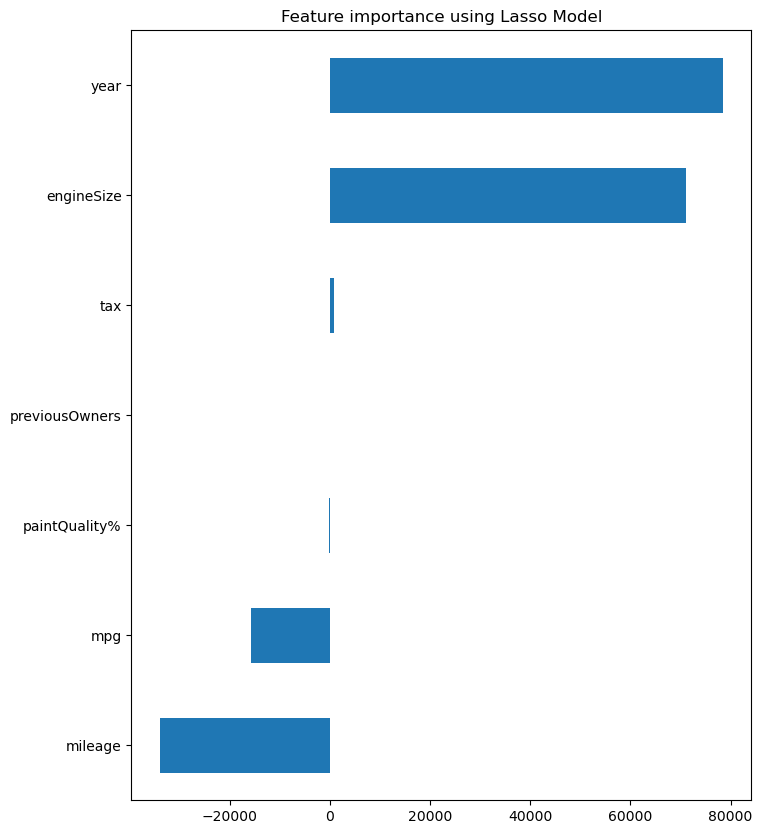

In [55]:
plot_importance(coef,'Lasso')

<hr>

### Numerical Data

| Predictor | Spearman | RFE LR| Lasso | What to do? (One possible way to "solve") | 
| --- | --- | --- | --- |---|
| year | Keep? | Keep | Keep | Include in the model |
| engineSize | Keep | Keep |Keep| Include in the model |
| tax | Keep?| Keep | Discard | Discard |
| previousOwners | Keep? | Discard | Discard | Discard |
| paintQuality% | Keep? | Discard | Discard | Discard |
| mpg | Keep? | Keep | Keep? | Try with and without |
| mileage | Keep | Keep | Keep | Keep |

<hr>


### Categorical Data

| Predictor | Correlation Ratio | 
| --- | --- | 
| Brand | Keep |  
|  model | Keep | 
| transmission | Keep |
| fuelType| Keep? |


<hr>



In [58]:
X_train_num_scaled = X_train_num_scaled.drop(columns=['tax', 'previousOwners', 'paintQuality%'])

X_val_num_scaled = X_val_num_scaled.drop(columns=['tax', 'previousOwners', 'paintQuality%'])

In [61]:
# 3. Fit model
model = LinearRegression()
model.fit(X_train_num_scaled, y_train)

# 4. Predict
y_pred = model.predict(X_val_num_scaled)

# 5. Evaluate
print(f"R²: {r2_score(y_val, y_pred):.3f}")
print(f"MAE: {mean_absolute_error(y_val, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_val, y_pred)):.2f}")

R²: 0.654
MAE: 3796.86
RMSE: 5742.56
